# Importing libraries 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from google.colab import files
uploaded = files.upload()

Saving cars_data.csv to cars_data (1).csv


In [0]:
import io
cars_data = pd.read_csv(io.BytesIO(uploaded['cars_data.csv']))

# Exploratory data analysis



In [68]:
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [69]:
cars_data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [70]:
cars_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [71]:
# to check null values 
cars_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [72]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [73]:
cars_data.shape

(11914, 16)

In [74]:
cars_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [75]:
cars_data.duplicated

<bound method DataFrame.duplicated of           Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]>

# Dealing with Outliers 


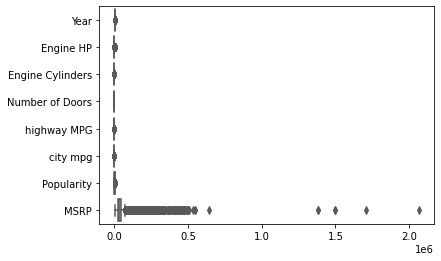

In [76]:
import seaborn as sns
sns.boxplot(data=cars_data,orient='h',palette='Set2')

# Preprocessing 

In [0]:
# dropping nan values
cars_data.dropna(inplace=True,axis=0)

In [33]:
cars_data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [0]:
cars_data['new msrp'] = np.log1p(cars_data.MSRP)
cars_data.drop('MSRP', axis=1, inplace=True)

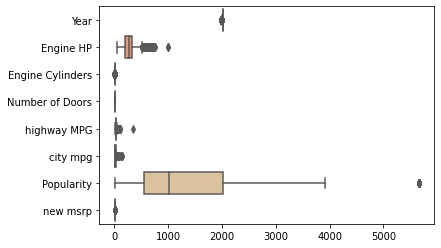

In [79]:
sns.boxplot(data=cars_data,orient='h',palette='Set2')

In [80]:
q1, q3 = np.percentile(cars_data['Popularity'],[25,75])
iqr = q3-q1
whisker = q3 + (1.5 * iqr)
print(whisker)

4199.0


In [0]:
cars_data['Popularity'] = cars_data['Popularity'].clip(upper=whisker)

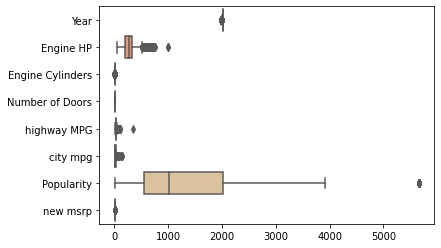

In [81]:
sns.boxplot(data=cars_data,orient='h',palette='Set2')

In [82]:
q1, q3 = np.percentile(cars_data['Engine HP'],[25,75])
iqr = q3-q1
whisker = q3 + (1.5 * iqr)
print(whisker)

512.0


In [0]:
cars_data['Engine HP'] = cars_data['Engine HP'].clip(upper=whisker)

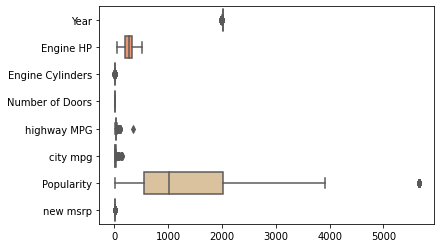

In [84]:
sns.boxplot(data=cars_data,orient='h',palette='Set2')

Converting category columns into numeric using Label encoder 

In [0]:
# For Label Encoder data types need to be category
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']
cars_data[columns_to_convert] = cars_data[columns_to_convert].astype('category')

In [86]:
cars_data.dtypes

Make                 category
Model                category
Year                    int64
Engine Fuel Type     category
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels        category
Number of Doors       float64
Market Category      category
Vehicle Size         category
Vehicle Style        category
highway MPG             int64
city mpg                int64
Popularity              int64
new msrp              float64
dtype: object

In [0]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']: cars_data[col] = label_encoder.fit_transform(cars_data[col])


In [88]:
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,new msrp
0,4,1,2011,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,10.739349
1,4,0,2011,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,10.612779
2,4,0,2011,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,10.500977
3,4,0,2011,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,10.290483
4,4,0,2011,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,10.448744


To find out correlation using heatmap 

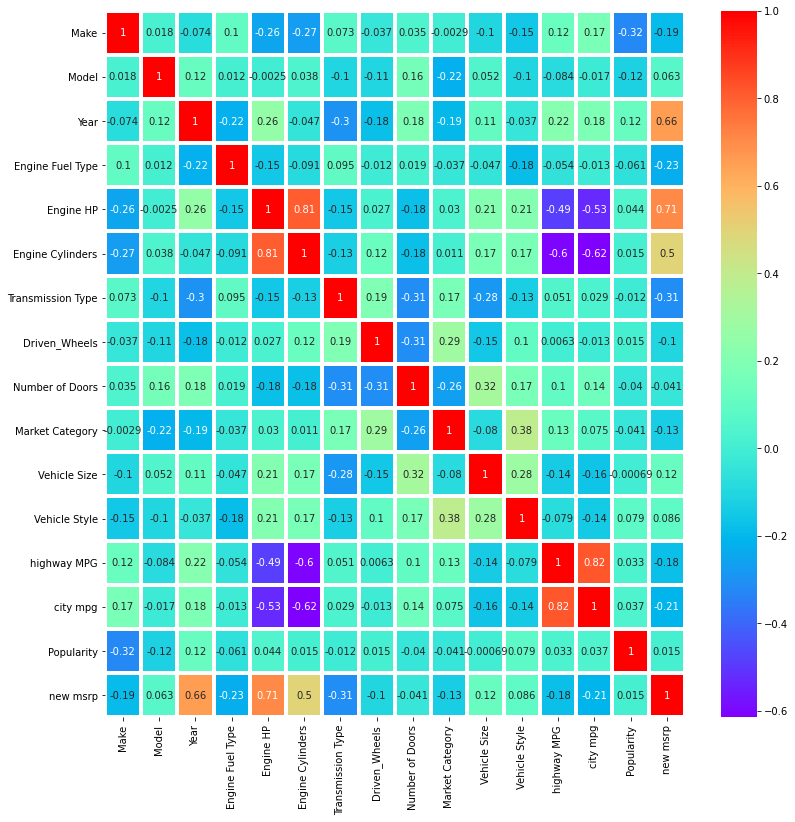

In [89]:
corrmat = cars_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
g=sns.heatmap(cars_data[top_corr_features].corr(),annot=True,cmap='rainbow',linewidths=3)


In [90]:
X = cars_data.corr()
X['new msrp'].sort_values(ascending=False)


new msrp             1.000000
Engine HP            0.707138
Year                 0.658258
Engine Cylinders     0.496731
Vehicle Size         0.117713
Vehicle Style        0.086207
Model                0.062594
Popularity           0.015144
Number of Doors     -0.040657
Driven_Wheels       -0.100777
Market Category     -0.134591
highway MPG         -0.179530
Make                -0.186651
city mpg            -0.208235
Engine Fuel Type    -0.229984
Transmission Type   -0.307729
Name: new msrp, dtype: float64

from correlation we conclude that Engine HP , Year, Engine Cylinders are highly correlated with target variable 

In [91]:
xy = ['new msrp','Engine HP','Year','Engine Cylinders']
data_ve = cars_data[xy]
New_data = cars_data.copy()
data_ve.head()

,new msrp,Engine HP,Year,Engine Cylinders
0,10.739349,335.0,2011,6.0
1,10.612779,300.0,2011,6.0
2,10.500977,300.0,2011,6.0
3,10.290483,230.0,2011,6.0
4,10.448744,230.0,2011,6.0


decoupling target variable 

In [92]:
data = data_ve
target = "new msrp"

X = cars_data[data.columns.difference([target])]
y = cars_data['new msrp']
print(X.shape)
y.shape


(8084, 3)


(8084,)

In [0]:
# Train - Test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124421)


# Model building 

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
#To retrieve the intercept:
print(linear.intercept_)
#For retrieving the slope:
print(linear.coef_)

-166.82964944931408
[0.10572249 0.00364979 0.08729008]


In [96]:
y_test_predict = linear.predict(X_test)
print(y_test_predict)
y_train_predict= linear.predict(X_train)
y_train_predict

[11.00385896 10.47549212  9.59790574 ...  9.89913054 10.35146148
 10.87642122]


array([10.9458293 , 10.5627822 , 10.89467016, ..., 11.77433104,
       10.90124967, 10.24160091])

In [97]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_predict})
df

,Actual,Predicted
5580,10.942987,11.003859
3254,10.962510,10.475492
8007,9.774290,9.597906
883,7.601402,8.531992
6708,7.601402,8.631880
...,...,...
8439,10.615726,10.887066
5567,10.568132,9.624247
11223,9.787010,9.899131
5966,10.665718,10.351461


In [98]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print(mean_squared_error(y_train,y_train_predict))
print(mean_squared_error(y_test,y_test_predict))

print(r2_score(y_train,y_train_predict))
print(r2_score(y_test,y_test_predict))

print(mean_absolute_error(y_train,y_train_predict))
print(mean_absolute_error(y_test,y_test_predict))

0.23204681163327529
0.23039797064990347
0.7549404145882743
0.7504764526018288
0.35575759652248046
0.35610508168992583


In [99]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))


0.4817123743825513
0.47999788608899463


# Hyper tunning technique with Gride searchcv 

In [100]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.7534976052254836
Residual sum of squares: 0.23
